In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from copy import deepcopy 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
# import combined dataset
in_path = "../Data/PrimaryLibrary/processed_z_score/"
merged_df = pd.read_csv(in_path + "inHouseDatasetsCombined.csv")
merged_df.head(1)

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,TSS Bucket,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1
0,OR6K6,Non-essential,158754721.0,AAAAAAAAAAGGTCATTCAG,CTAGAAAAAAAAAAGGTCATTCAGGGGTCC,-0.1532,-24.0,"[-50, 0)",0.216872,0.023685,-0.110835,-0.744721,-0.265074,-1.285187,-0.272546,-1.421982


In [3]:
overlapping_gene = pd.read_csv('../Data/CRISPRiChallenges/geneOverlap/GW_ensembl_protein_coding_df_1kb.csv')
overlapping_gene_2_3 =overlapping_gene[overlapping_gene['overlap type'].isin([2,3])]
gene_2_3_unique = set(list(overlapping_gene_2_3['Selected Gene name']) +\
list(overlapping_gene_2_3['Overlapping Gene name']))
merged_overlappingGene= deepcopy(merged_df[merged_df['Target Gene Symbol'].isin(gene_2_3_unique)])

In [4]:
overlapGeneIninhouseDataset = overlapping_gene_2_3[overlapping_gene_2_3['Overlapping Gene name'].isin(merged_df['Target Gene Symbol']) | overlapping_gene_2_3['Selected Gene name'].isin(merged_df['Target Gene Symbol'])]


In [6]:
depmap = "../Data/CRISPRiChallenges/DepMap/"
depmap_df = pd.read_excel(depmap + "HCT116_A549_depmap genes scores.xlsx", sheet_name = "Depmap scores A549")

In [7]:
ess_gene_depmap = depmap_df[depmap_df['gene_effect'] <= -1]
ess_gene_depmap.head(1)

,gene,gene_effect,z_score,mean,stddev
0,FOXA2,-1.01135,-4.870456,-0.113376,0.184372


In [8]:
overlapGeneIninhouseDataset[overlapGeneIninhouseDataset['Overlapping Gene name'].isin(ess_gene_depmap['gene']) & 
                            overlapGeneIninhouseDataset['Selected Gene name'].isin(ess_gene_depmap['gene'])]



,Selected Gene,Overlapping Gene,Overlapping Strand,Overlapping Gene name,Overlapping Gene start (bp),Overlapping Gene end (bp),Selected Strand,Selected Gene name,Selected Gene start (bp),Selected Gene end (bp),overlap type
438,ENSG00000070010,ENSG00000093009,1,CDC45,19479457,19520612,-1,UFD1,19449911,19479202,2.0
439,ENSG00000093009,ENSG00000070010,-1,UFD1,19449911,19479202,1,CDC45,19479457,19520612,2.0


In [9]:
selectGene = 'CDC45'#AAMP PDCD11 USP5 TRMT5
#yes ANKRD49
# no PFDN2
selectGeneDf = merged_df[merged_df['Target Gene Symbol'] == selectGene]
y_min = -10
y_max = 10

In [10]:
overlapping_gene_2_3[overlapping_gene_2_3['Overlapping Gene name'] == selectGene]

,Selected Gene,Overlapping Gene,Overlapping Strand,Overlapping Gene name,Overlapping Gene start (bp),Overlapping Gene end (bp),Selected Strand,Selected Gene name,Selected Gene start (bp),Selected Gene end (bp),overlap type
438,ENSG00000070010,ENSG00000093009,1,CDC45,19479457,19520612,-1,UFD1,19449911,19479202,2.0


In [11]:
selectGeneDf['TSS Bucket'].value_counts()

[-1000, -500)    105
[500, 1000)       48
[100, 200)        39
[300, 400)        30
[400, 500)        23
[-200, -100)      16
[-300, -200)      15
[200, 300)        14
[-50, 0)          13
[-500, -400)      13
[-400, -300)      11
[0, 50)            9
[-100, -50)        7
[50, 100)          6
Name: TSS Bucket, dtype: int64

In [12]:
selectGeneDf[selectGeneDf['TSS Bucket'] == '[0, 50)']

,Target Gene Symbol,Category,TSS Position,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,sgRNA 'Cut' Site TSS Offset,TSS Bucket,avg_lfc_A549_Zim3,z_scored_avg_lfc_A549_Zim3,avg_lfc_A549_Kox1,z_scored_avg_lfc_A549_Kox1,avg_lfc_HCT116_Zim3,z_scored_avg_lfc_HCT116_Zim3,avg_lfc_HCT116_Kox1,z_scored_avg_lfc_HCT116_Kox1
9007,CDC45,Essential,19479921.0,ACGAACATAGCCACGGCGGC,GGACACGAACATAGCCACGGCGGCCGGACG,-0.64420,39.0,"[0, 50)",0.110204,-0.260496,0.225280,0.071461,-0.142783,-0.989147,0.419541,0.401627
13632,CDC45,Essential,19479921.0,AGCCACGGCGGCCGGACGCC,ACATAGCCACGGCGGCCGGACGCCTGGCGC,-1.03400,31.0,"[0, 50)",0.353879,0.388691,-0.069895,-0.645308,0.892126,1.516132,0.713990,1.177484
20862,CDC45,Essential,19479921.0,ATCGGACACGAACATAGCCA,GGAAATCGGACACGAACATAGCCACGGCGG,0.56120,46.0,"[0, 50)",-0.512285,-1.918905,-0.829349,-2.489479,-1.403153,-4.040217,-1.457128,-4.543290
27700,CDC45,Essential,19479921.0,CAGCGCGAGCGCCAGGCGTC,ACCTCAGCGCGAGCGCCAGGCGTCCGGCCG,0.06374,31.0,"[0, 50)",-2.265982,-6.591032,-1.994627,-5.319110,-2.612504,-6.967779,-2.489213,-7.262777
51578,CDC45,Essential,19479921.0,CTTGACCGCCGCCGGGCTCT,GAGTCTTGACCGCCGCCGGGCTCTTGGTAC,-0.62180,3.0,"[0, 50)",-2.612607,-7.514495,-2.638293,-6.882114,-3.828519,-9.911476,-3.395049,-9.649603
55101,CDC45,Essential,19479921.0,GACGCCTGGCGCTCGCGCTG,GCCGGACGCCTGGCGCTCGCGCTGAGGTAC,-0.13170,17.0,"[0, 50)",-2.636021,-7.576873,-2.898710,-7.514482,-3.255247,-8.523715,-3.051662,-8.744797
65041,CDC45,Essential,19479921.0,GCGCTGAGGTACCAAGAGCC,GCTCGCGCTGAGGTACCAAGAGCCCGGCGG,-0.41230,3.0,"[0, 50)",-1.041885,-3.329845,-1.382211,-3.831987,-1.541385,-4.374844,-0.914509,-3.113520
69044,CDC45,Essential,19479921.0,GGACACGAACATAGCCACGG,AATCGGACACGAACATAGCCACGGCGGCCG,0.56450,43.0,"[0, 50)",-2.424264,-7.012719,-3.045302,-7.870449,-2.677606,-7.125377,-3.187707,-9.103269
78209,CDC45,Essential,19479921.0,GGTACCTCAGCGCGAGCGCC,TCTTGGTACCTCAGCGCGAGCGCCAGGCGT,-0.90690,24.0,"[0, 50)",-1.759373,-5.241345,-1.392295,-3.856473,-2.144533,-5.834930,-1.411526,-4.423132


In [13]:
within_range = selectGeneDf[(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= 25) & (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= 75)]
outside_range = selectGeneDf[(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] < 25) | (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] > 75)]

average_within_range = within_range['z_scored_avg_lfc_A549_Kox1'].median()
average_outside_range = outside_range['z_scored_avg_lfc_A549_Kox1'].median()

print(f"Average of y within 25 to 75: {average_within_range}")
print(f"Average of y outside 25 to 75: {average_outside_range}")

Average of y within 25 to 75: -2.183866844121552
Average of y outside 25 to 75: -0.5023760647450356


In [14]:
len(within_range)

7

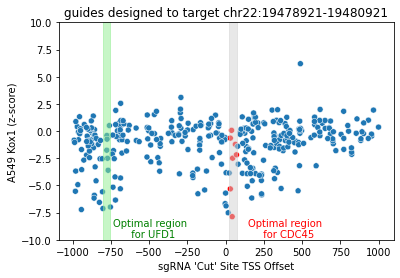

In [16]:
graph_pathout = '../Figure/Figure 2/Individual Figures/'
plt.figure(figsize=(6, 4))
default_colors = sns.color_palette()
ax = sns.scatterplot(data = selectGeneDf, x='sgRNA \'Cut\' Site TSS Offset', 
                y='z_scored_avg_lfc_A549_Kox1',
                   hue=(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'].between(25, 75)), palette={True: 'red', False: default_colors[0]}, legend=False)
#AAMP: https://portals.broadinstitute.org/gppx/crispick/platform/results/3c2197e7-cdc5-48c0-b9c0-063b6385ea9c
#MRE11: https://portals.broadinstitute.org/gppx/crispick/platform/results/17d759b4-e05b-4102-ad75-e1cf77467913
#UFD1: https://portals.broadinstitute.org/gppx/crispick/platform/results/d7f33b9d-1613-4270-8583-9d01ffa05a1d

# Input	Quota	Target Taxon	Target Gene ID	Target Gene Symbol	Target Alias	CRISPR Mechanism	Target Domain	Reference Sequence	Strand of Target	TSS Position	PAM Policy	Off-Target Match Ruleset Version	Off-Target Tier Policy	Off-Target Match Bin Policy	Strand of sgRNA	Orientation	sgRNA 'Cut' Position
# UFD1	1	9606	7353	UFD1	UFD1	CRISPRi	[TSS-50,TSS+300]	NC_000022.11	-	19479193	SpyoCas9	1	1	5.20.100	-	sense	19479149

# Input	Quota	Target Taxon	Target Gene ID	Target Gene Symbol	Target Alias	CRISPR Mechanism	Target Domain	Reference Sequence	Strand of Target	TSS Position
# MRE11	1	9606	4361	MRE11	MRE11	CRISPRi	[TSS-50,TSS+300]	NC_000011.10	-	94493844
ax.set_ylim(y_min, y_max)
plt.fill_betweenx(y=[y_min, y_max], 
                  x1=25, x2=75, color='lightgrey', alpha=0.5)

#plt.axvline(x=(94493844.0 - 94493985.0), color = 'green')
diff = (19479193.0 - 19479921.0)
plt.fill_betweenx(y=[y_min, y_max], 
                  x1=diff-25, x2=diff-75, color='lightgreen', alpha=0.5)

# plt.fill_betweenx(y=[y_min, y_max], 
#                   x1=(94493844.0 - 94493985.0)-25, x2=(94493844.0 - 94493985.0)-75, color='lightgreen', alpha=0.5)

plt.text(-(218270520 - 218270137)-100, -8, 'Optimal region \n for UFD1', color='green', ha='center', va='top', fontsize=10)
plt.text(400, -8, 'Optimal region \n for CDC45', color='red', ha='center', va='top', fontsize=10)
plt.ylabel('A549 Kox1 (z-score)')
plt.title('guides designed to target chr22:19478921-19480921')
plt.savefig(graph_pathout + "CDC45.pdf", dpi=300, bbox_inches='tight')


In [17]:
other_within_range = selectGeneDf[(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= diff-75) & 
                                  (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= diff-25)]

other_average_within_range = other_within_range['z_scored_avg_lfc_A549_Kox1'].median()

print(f"Average of y within {diff-25} to {diff-75}: {other_average_within_range}")


Average of y within -753.0 to -803.0: -1.7569742614053712


In [19]:
all_other_guide = selectGeneDf[~(((selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= diff-75) & 
            (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= diff-25)) |
            ((selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= 25) &
            (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= 75)))]
all_other_guide['z_scored_avg_lfc_A549_Kox1'].median()

-0.4615326197961498

In [20]:
selectGene = 'ZNF131'
selectGeneDf = merged_df[merged_df['Target Gene Symbol'] == selectGene].copy()


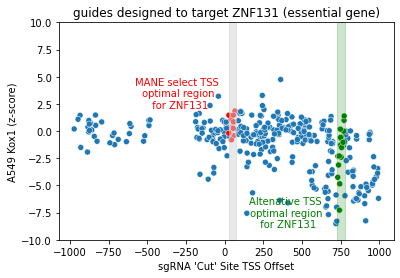

In [21]:
#02 TSS for ZNF121
#https://genome.ucsc.edu/cgi-bin/hgc?hgsid=2297900164_Le4bOO43Sd9Za7Sa71m3AAWY2YBC&db=hg38&c=chr5&l=43119345&r=43125408&o=43121609&t=43121651&g=robustPeaks&i=p2%40ZNF131
#chr5:43121610-43121651 for p2
tss_p1 = 43120915 # CRISPick
tss_p2 = 43121616 # one based system asked tom to check the bed file round((43121610+43121651)/2)

# Define a custom palette for the scatter plot
palette = {'other': default_colors[0], 'p1 optimal': 'red', 'p2 optimal': 'green'}

# Create a new column to define the color categories
selectGeneDf['color'] = 'other'  # default blue
selectGeneDf.loc[selectGeneDf['sgRNA \'Cut\' Site TSS Offset'].between(25, 75), 'color'] = 'p1 optimal'  # red for range 25-75
selectGeneDf.loc[selectGeneDf['sgRNA \'Cut\' Site TSS Offset'].between(tss_p2-43120915.0+25, tss_p2-43120915.0+75), 'color'] = 'p2 optimal'  # green for range 100-120

# Plotting with seaborn
plt.figure(figsize=(6,4))

ax = sns.scatterplot(data = selectGeneDf, x='sgRNA \'Cut\' Site TSS Offset', 
                y='z_scored_avg_lfc_A549_Kox1',
                   hue='color', palette=palette, legend=False)

ax.set_ylim(y_min, y_max)
plt.fill_betweenx(y=[y_min, y_max], 
                  x1=25, x2=75, color='lightgrey', alpha=0.5)
plt.text(-300, 5, 'MANE select TSS \n optimal region \n for ZNF131', color='red', ha='center', va='top', fontsize=10)

plt.ylabel('A549 Kox1 (z-score)')


#plt.axvline(x=tss_p2-tss_p1, color = 'green')
plt.fill_betweenx(y=[y_min, y_max], 
                  x1=tss_p2-tss_p1+25, x2=tss_p2-tss_p1+75, color='green', alpha=0.2)
plt.text(400, -6, 'Altenative TSS \n optimal region \n for ZNF131', color='green', ha='center', va='top', fontsize=10)

plt.title('guides designed to target ZNF131 (essential gene)')

plt.savefig(graph_pathout + "ZNF131.pdf", dpi=300, bbox_inches='tight')



In [22]:
ZNF131_within_range_p1 = selectGeneDf[(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= 25) & (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= 75)]
ZNF131_within_range_p2 = selectGeneDf[(selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= tss_p2-tss_p1+25) & (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= tss_p2-tss_p1+75)]
other_range = selectGeneDf[~(((selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= 25) & (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= 75)) |
            ((selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] >= tss_p2-tss_p1+25) & (selectGeneDf['sgRNA \'Cut\' Site TSS Offset'] <= tss_p2-tss_p1+75)))]




print(f"Median of y within p1: {ZNF131_within_range_p1['z_scored_avg_lfc_A549_Kox1'].median()}")
print(f"Median of y within p2: {ZNF131_within_range_p2['z_scored_avg_lfc_A549_Kox1'].median()}")
print(f"Median of y within other: {other_range['z_scored_avg_lfc_A549_Kox1'].median()}")

Median of y within p1: 0.3558264125189635
Median of y within p2: -1.271011414442492
Median of y within other: -0.41306044756649674


In [23]:
len(other_range)

296

In [24]:
depmap_df[depmap_df['gene'] == 'ZNF131']

,gene,gene_effect,z_score,mean,stddev
15220,ZNF131,-0.829037,0.900199,-1.049103,0.244464
